# Modelo de Prediccion
### Predicción de Producción Eólica y Factor de Viento Medio

En este notebook, vamos a entrenar varios modelos de predicción (Regresión Lineal, SVM y KNN) para predecir la **producción diaria de energía eólica** y el **factor de viento medio**. La predicción se basará en las características del viento, como el viento medio, ráfagas y otras métricas asociadas.

### Librerías necesarias

Antes de empezar, vamos a importar las librerías necesarias.

In [118]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler 

### Carga de datos

En este paso, cargaremos el archivo CSV con los datos eólicos y realizaremos una revisión inicial.


In [119]:
df = pd.read_csv("../data/processed/produccion_simulada_eolica.csv")
df.head()

,Año,Mes,Día,Temp Media,Temp Máxima,Hora Temp Max,Minuto Temp Max,Temp Mínima,Hora Temp Min,Minuto Temp Min,Viento Medio,Ráfaga de Viento,Hora Viento,Minuto Viento,Presión Media,factor_capacidad,produccion_diaria_MWh
0,2016,1,1,10.3,11.2,20,40,9.2,1,30,11.7,29.0,6,55,1004.6,0.6,483.84
1,2016,1,2,11.8,18.1,19,30,8.6,0,55,22.0,69.2,15,20,996.2,0.8,645.12
2,2016,1,3,11.3,16.4,15,0,5.6,5,40,28.1,59.5,10,35,1004.3,1.0,806.40
3,2016,1,4,12.5,18.6,15,20,6.1,2,50,29.0,67.6,17,30,1004.1,1.0,806.40
4,2016,1,5,12.0,18.8,15,15,6.1,23,55,42.7,86.9,16,15,1005.4,1.0,806.40


### Ajustar los Datos para la Predicción de Producción Diaria
Primero, para poder predecir la producción diaria de energía eólica, se utilizará una columna que la represente. Vamos a crearla utilizando el viento medio y un factor de conversión que puedes definir según la potencia de la turbina y otras características de la estación eólica.

In [120]:
# Crear la columna 'produccion_diaria' utilizando una fórmula simplificada
# Esto dependerá del factor de conversión, que puede estar basado en los parámetros del parque eólico.
df['produccion_diaria'] = df['Viento Medio'] ** 3 * 0.5  # Factor de conversión ejemplo

# Verifica que se haya agregado correctamente la columna
df[['Viento Medio', 'produccion_diaria']].head()

,Viento Medio,produccion_diaria
0,11.7,800.8065
1,22.0,5324.0000
2,28.1,11094.0205
3,29.0,12194.5000
4,42.7,38927.2415


### Dividir los Datos en Variables Independientes y Dependientes
A continuación, separaremos las variables independientes (X) y dependientes (y) para predecir la producción diaria.

In [121]:
X = df[['Viento Medio']] 
y = df['produccion_diaria']  

### Dividir los Datos en Conjunto de Entrenamiento, Prueba y Escalamiento
Dividimos los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%). Luego se realzia el escalamiento de las caracteristicas

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Escalar las características (X) --- 
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)  # Aplicar el escalado a los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Aplicar el escalado a los datos de prueba

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print(f'Conjunto de entrenamiento: {X_train_scaled.shape}')
print(f'Conjunto de prueba: {X_test_scaled.shape}')

Conjunto de entrenamiento: (2561, 1)
Conjunto de prueba: (641, 1)


### Crear y evaluar los modelos
Ahora entrenaremos los modelos para predecir la producción diaria de energía eólica.
>Regresión Lineal

In [123]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)  # Entrenar el modelo con los datos escalados

# Realizar predicciones
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluación del modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Regresión Lineal - MSE: {mse_linear}, R²: {r2_linear}")

Regresión Lineal - MSE: 17432215.393785264, R²: 0.7742270191607208


>Support Vector Machine (SVM)

In [124]:
svm = SVR(kernel='linear')  
svm.fit(X_train_scaled, y_train)  

# Realizar predicciones
y_pred_svm = svm.predict(X_test_scaled)

# Evaluar el modelo
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'SVM - MSE: {mse_svm}')
print(f'SVM - R2: {r2_svm}')


SVM - MSE: 60046627.596291125
SVM - R2: 0.2223073318269161


>Árbol de Decisión

In [125]:
tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)  
tree_regressor.fit(X_train_scaled, y_train)  

# Realizar predicciones
y_pred_tree = tree_regressor.predict(X_test_scaled)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Árbol de Decisión - MSE: {mse_tree}')
print(f'Árbol de Decisión - R2: {r2_tree}')


Árbol de Decisión - MSE: 5437.745896127396
Árbol de Decisión - R2: 0.9999295731453357


Visualización de los Resultados

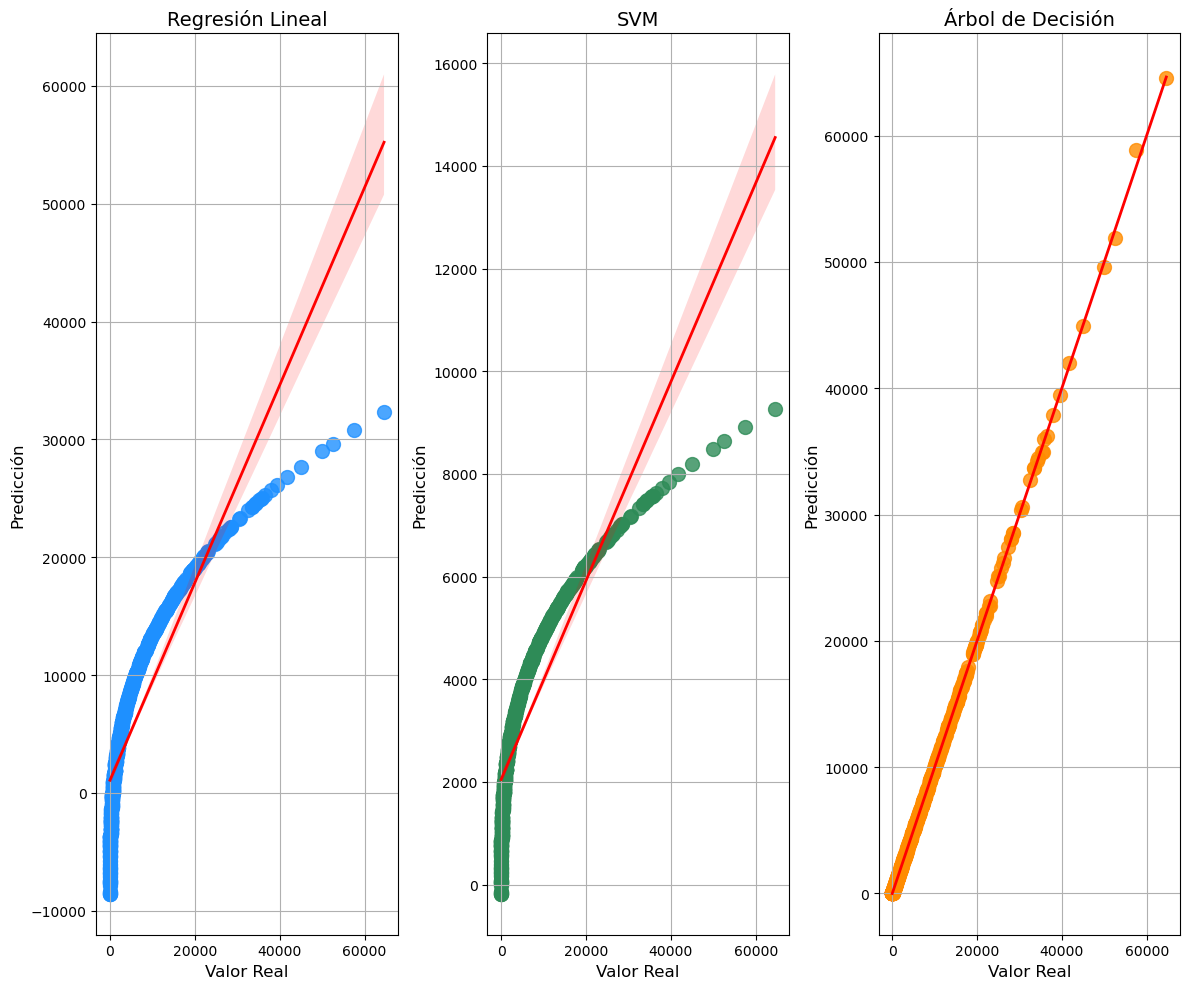

In [126]:

plt.figure(figsize=(12, 10))

# Gráfico de la regresión lineal
plt.subplot(131)
sns.regplot(x=y_test, y=y_pred_linear, scatter_kws={'s': 100, 'color': 'dodgerblue'}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Regresión Lineal', fontsize=14)
plt.xlabel('Valor Real', fontsize=12)
plt.ylabel('Predicción', fontsize=12)
plt.grid(True)

# Gráfico de SVM
plt.subplot(132)
sns.regplot(x=y_test, y=y_pred_svm, scatter_kws={'s': 100, 'color': 'seagreen'}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('SVM', fontsize=14)
plt.xlabel('Valor Real', fontsize=12)
plt.ylabel('Predicción', fontsize=12)
plt.grid(True)

# Gráfico del Árbol de Decisión
plt.subplot(133)
sns.regplot(x=y_test, y=y_pred_tree, scatter_kws={'s': 100, 'color': 'darkorange'}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Árbol de Decisión', fontsize=14)
plt.xlabel('Valor Real', fontsize=12)
plt.ylabel('Predicción', fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()

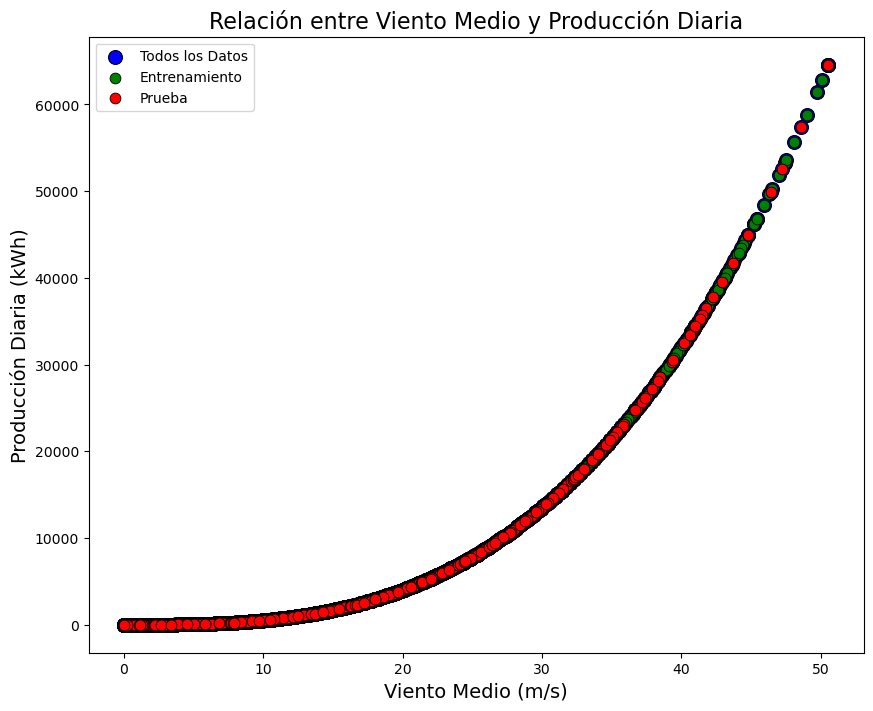

In [127]:
# --- Gráfico de dispersión entre Viento Medio y Producción Diaria ---
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Viento Medio'], y=df['produccion_diaria'], color='blue', s=100, edgecolor='black', marker='o', label='Todos los Datos')

sns.scatterplot(x=X_train['Viento Medio'], y=y_train, color='green', s=60, edgecolor='black', marker='o', label='Entrenamiento')
sns.scatterplot(x=X_test['Viento Medio'], y=y_test, color='red', s=60, edgecolor='black', marker='o', label='Prueba')

plt.title('Relación entre Viento Medio y Producción Diaria', fontsize=16) 
plt.xlabel('Viento Medio (m/s)', fontsize=14)  
plt.ylabel('Producción Diaria (kWh)', fontsize=14)  
plt.legend()  
plt.show()